In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dffruit = pd.read_excel('fruit.xlsx')

In [4]:
dffruit

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,grapefruit
9996,15.41,254.67,148,68,7,grapefruit
9997,15.59,256.50,168,82,20,grapefruit
9998,15.92,260.14,142,72,11,grapefruit


In [5]:
dffruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [6]:
dffruit.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [7]:
pd.unique(dffruit['name'])

array(['orange', 'grapefruit'], dtype=object)

In [8]:
x = dffruit.iloc[:, :-1].values
y = dffruit.iloc[:, -1:].values

In [9]:
x

array([[  2.96,  86.76, 172.  ,  85.  ,   2.  ],
       [  3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  4.42,  95.17, 156.  ,  81.  ,   2.  ],
       ...,
       [ 15.59, 256.5 , 168.  ,  82.  ,  20.  ],
       [ 15.92, 260.14, 142.  ,  72.  ,  11.  ],
       [ 16.45, 261.51, 152.  ,  74.  ,   2.  ]])

In [10]:
y

array([['orange'],
       ['orange'],
       ['orange'],
       ...,
       ['grapefruit'],
       ['grapefruit'],
       ['grapefruit']], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
labelEn = LabelEncoder()
y = labelEn.fit_transform(dffruit['name'])

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_trainsc = scaler.fit_transform(x_train)
x_testsc = scaler.transform(x_test)

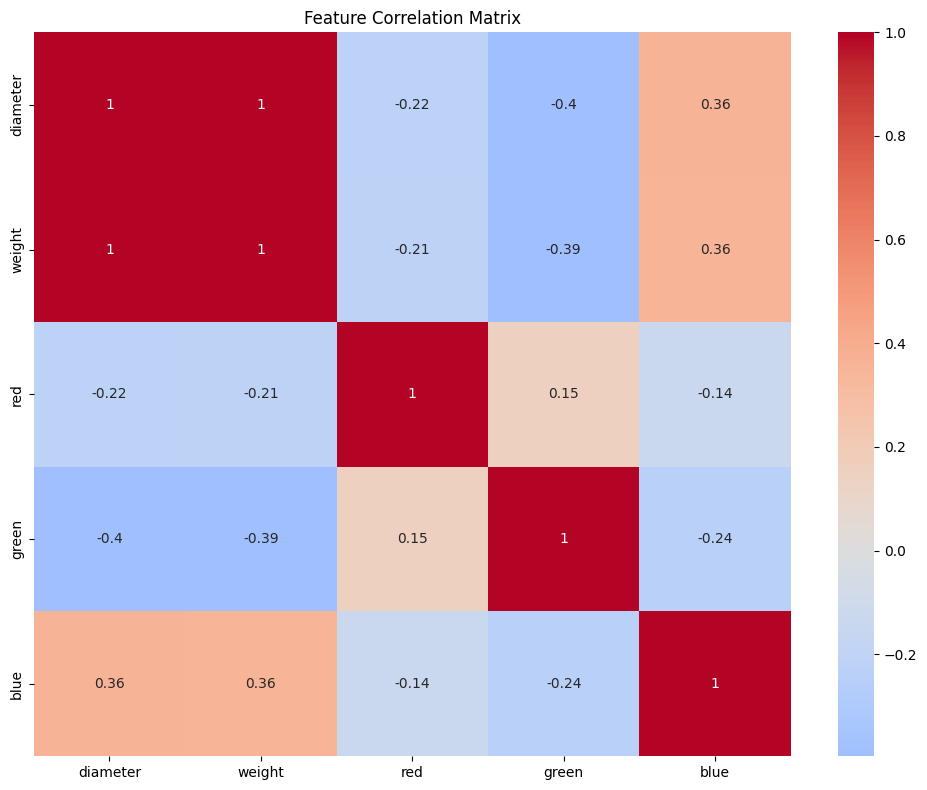

In [14]:
import seaborn as sns
plt.figure(figsize = (10, 8))
correlation_matrix = dffruit[['diameter', 'weight', 'red', 'green', 'blue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(random_state=0)
perceptron.fit(x_trainsc, y_train)

Perceptron()

In [16]:
from sklearn.metrics import accuracy_score
y_prediksi = perceptron.predict(x_testsc)
akurasi_perceptron = accuracy_score(y_test, y_prediksi)

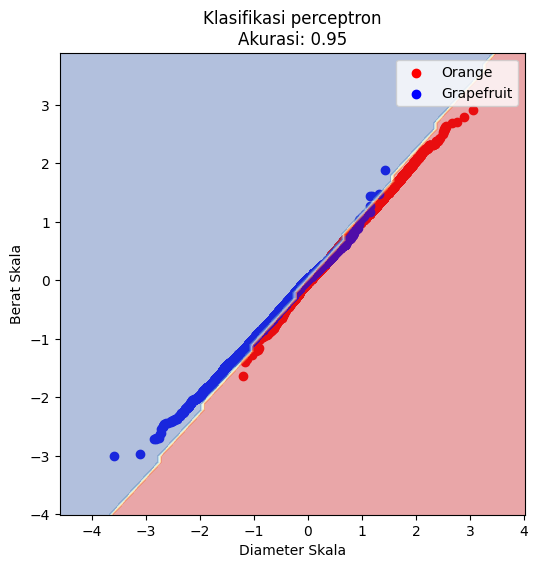

In [17]:
# Plot untuk perceptron
plt.figure(figsize=(6, 6))

# Plot training points - menggunakan data training yang sudah discaling
plt.scatter(x_trainsc[y_train == 0, 0], x_trainsc[y_train == 0, 1], color='red', label='Orange')
plt.scatter(x_trainsc[y_train == 1, 0], x_trainsc[y_train == 1, 1], color='blue', label='Grapefruit')

# Create mesh grid berdasarkan data training yang sudah discaling
x_min, x_max = x_trainsc[:, 0].min() - 1, x_trainsc[:, 0].max() + 1
y_min, y_max = x_trainsc[:, 1].min() - 1, x_trainsc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

# Make predictions for mesh points
mesh_predictions = perceptron.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
mesh_predictions = mesh_predictions.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, mesh_predictions, alpha=0.4, cmap='RdYlBu')
plt.title(f'Klasifikasi perceptron\nAkurasi: {akurasi_perceptron:.2f}')
plt.xlabel('Diameter Skala')
plt.ylabel('Berat Skala')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sb

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1012
           1       0.99      0.91      0.95       988

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



<Axes: >

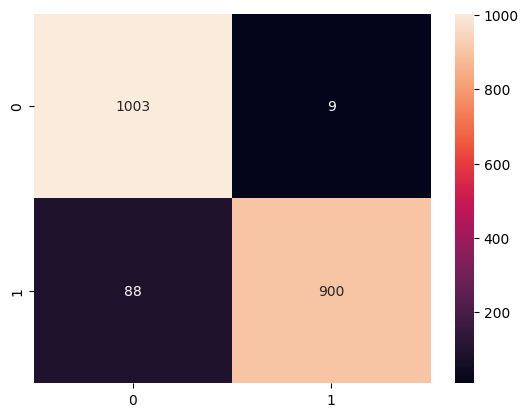

In [19]:
print(classification_report(y_test, y_prediksi))
sb.heatmap(confusion_matrix(y_test, y_prediksi), annot=True, fmt='d')

In [20]:
feature = ['diameter', 'weight', 'red', 'green', 'blue']

# Pentingnya Fitur Perceptron
if hasattr(perceptron, 'coef_'):
    perceptron_penting = pd.DataFrame({'Feature': feature, 'Importance': np.abs(perceptron.coef_[0])}).sort_values('Importance', ascending=False)
    print("\nPentingnya Fitur perceptron:")
    print(perceptron_penting)


Pentingnya Fitur perceptron:
    Feature  Importance
0  diameter   52.032400
1    weight   46.626945
2       red    0.861883
3     green    0.684200
4      blue    0.442282


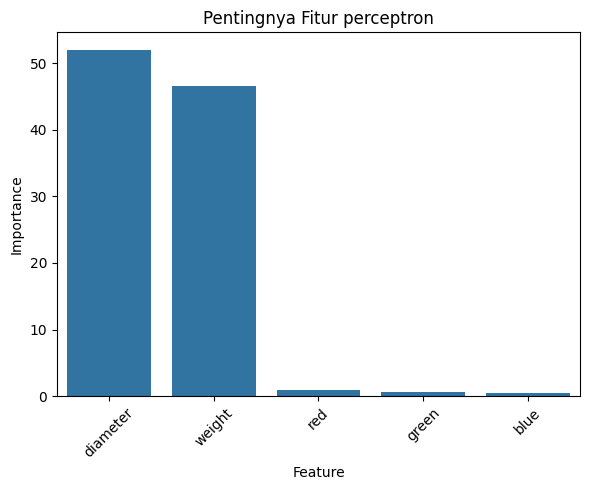

In [21]:
if hasattr(perceptron, 'coef_'):
    plt.figure(figsize = (6, 5))
    sns.barplot(data = perceptron_penting, x='Feature', y='Importance')
    plt.title('Pentingnya Fitur perceptron')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

In [22]:
print("\nLaporan Klasifikasi perceptron:")
print(classification_report(y_test, y_prediksi, target_names=['Orange', 'Grapefruit']))


Laporan Klasifikasi perceptron:
              precision    recall  f1-score   support

      Orange       0.92      0.99      0.95      1012
  Grapefruit       0.99      0.91      0.95       988

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [23]:
label = {0: "Orange", 1: "Grapefruit"}
perceptron.label = label

In [24]:
import pickle
pickle.dump(perceptron, open('perceptron.pkl', 'wb'))